In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/data_anay/Dataset_Final_Preprocessed.csv', encoding='UTF-8')

# StandardScaler 사용
scaler = StandardScaler()

y = data.iloc[:, [6]]
X = data.drop(columns=data.columns[:8])

# StandardScaler 사용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X

In [ ]:
# cad_icd_code 열 처리
selected_column_cad = y['cad_icd_code']
binary_labels_cad = selected_column_cad.notna().astype(int)
y['binary_cad_icd_code'] = binary_labels_cad


# 원본 열 삭제
y = y.drop(columns=['cad_icd_code'])

In [ ]:
y

In [8]:
# 데이터를 8:2 비율로 훈련 및 테스트 세트로 분할하고 셔플링
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

**RUSBoost**

In [ ]:
from imblearn.ensemble import RUSBoostClassifier

# RUSBoost 모델 훈련
rusboost_model = RUSBoostClassifier(random_state=0)
rusboost_model.fit(train_X, train_y)

# 테스트 데이터에 대한 예측 확률
y_pred_proba_rusboost = rusboost_model.predict_proba(test_X)[:, 1]

In [ ]:
# 정확도 측정
y_pred = rusboost_model.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# AUC 성능 측정
auc_score = roc_auc_score(test_y, y_pred_proba_rusboost)
print("AUC Score:", auc_score)

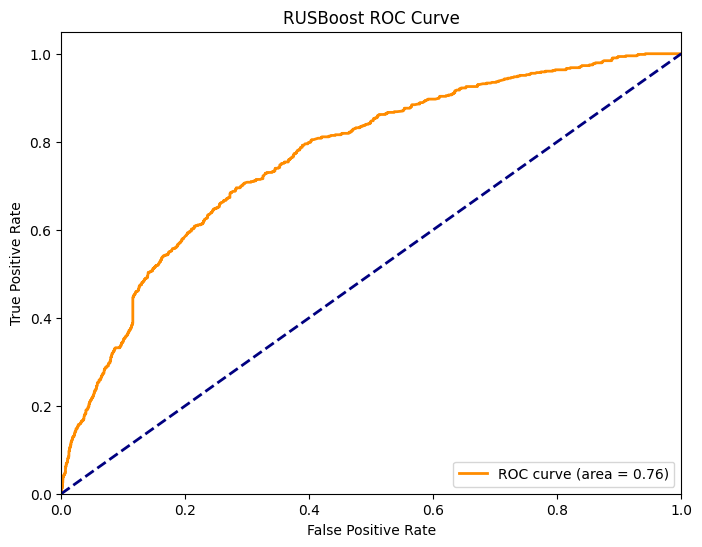

In [12]:
# AUC-ROC 곡선 시각화
fpr, tpr, _ = roc_curve(test_y, y_pred_proba_rusboost)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RUSBoost ROC Curve')
plt.legend(loc='lower right')
plt.show()

**EasyEnsemble**

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier

easyensemble_model = EasyEnsembleClassifier(random_state=0)
easyensemble_model.fit(train_X, train_y)

# 테스트 데이터에 대한 예측 확률
y_pred_proba_easyensemble = easyensemble_model.predict_proba(test_X)[:, 1]

In [ ]:
# AUC 성능 측정
auc_score = roc_auc_score(test_y, y_pred_proba_easyensemble)
print("AUC Score:", auc_score)

# 정확도 측정
y_pred = easyensemble_model.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# AUC-ROC 곡선 시각화
fpr, tpr, _ = roc_curve(test_y, y_pred_proba_easyensemble)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('EasyEnsemble ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Random** **Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler

# 언더샘플링 수행
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=0)
X_resampled, y_resampled = undersampler.fit_resample(train_X, train_y)

# Random Forest 모델 훈련
random_forest_model = RandomForestClassifier(random_state=0)
random_forest_model.fit(X_resampled, y_resampled)

# 테스트 데이터에 대한 예측 확률
y_pred_proba_random_forest = random_forest_model.predict_proba(test_X)[:, 1]

In [ ]:
# AUC 성능 측정
auc_score = roc_auc_score(test_y, y_pred_proba_random_forest)
print("AUC Score:", auc_score)

# 정확도 측정
y_pred = random_forest_model.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# AUC-ROC 곡선 시각화
fpr, tpr, _ = roc_curve(test_y, y_pred_proba_random_forest)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF with undersampling ROC Curve')
plt.legend(loc='lower right')
plt.show()

**BalancedRandomForest**

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf_model = BalancedRandomForestClassifier(random_state=0)
brf_model.fit(train_X, train_y)

y_pred_proba_brf = brf_model.predict_proba(test_X)[:, 1]

In [ ]:
# AUC 성능 측정
auc_score_brf = roc_auc_score(test_y, y_pred_proba_brf)
print("BalancedRandomForest AUC Score:", auc_score_brf)

# 정확도 측정
y_pred_brf = brf_model.predict(test_X)
accuracy_brf = accuracy_score(test_y, y_pred_brf)
print("BalancedRandomForest Accuracy:", accuracy_brf)

In [ ]:
# AUC-ROC 곡선 시각화
fpr_brf, tpr_brf, _ = roc_curve(test_y, y_pred_proba_brf)
roc_auc_brf = auc(fpr_brf, tpr_brf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_brf, tpr_brf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_brf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BalancedRandomForest ROC Curve')
plt.legend(loc='lower right')
plt.show()

**BalancedBagging**

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier

# BalancedBaggingClassifier를 사용한 코드
bbc_model = BalancedBaggingClassifier(random_state=0)
bbc_model.fit(train_X, train_y)

# 테스트 데이터에 대한 예측 확률
y_pred_proba_bbc = bbc_model.predict_proba(test_X)[:, 1]

In [ ]:
# AUC 성능 측정
auc_score_bbc = roc_auc_score(test_y, y_pred_proba_bbc)
print("BalancedBaggingClassifier AUC Score:", auc_score_bbc)

# 정확도 측정
y_pred_bbc = bbc_model.predict(test_X)
accuracy_bbc = accuracy_score(test_y, y_pred_bbc)
print("BalancedBaggingClassifier Accuracy:", accuracy_bbc)

In [ ]:
# AUC-ROC 곡선 시각화
fpr_bbc, tpr_bbc, _ = roc_curve(test_y, y_pred_proba_bbc)
roc_auc_bbc = auc(fpr_bbc, tpr_bbc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_bbc, tpr_bbc, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_bbc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BalancedBagging ROC Curve')
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


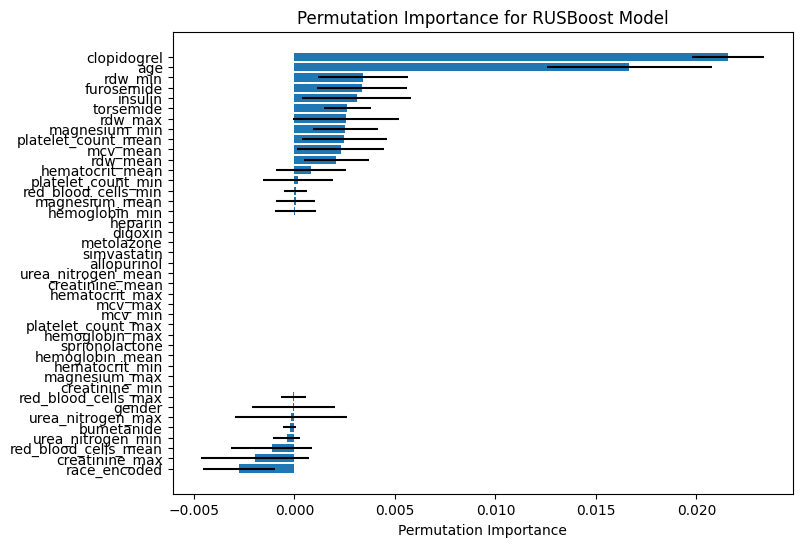

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance

# RUSBoost 모델 훈련 (이미 훈련된 모델이 있다고 가정)
rusboost_model = RUSBoostClassifier(random_state=0)
rusboost_model.fit(train_X, train_y)

# Permutation Importance 계산
perm_importance = permutation_importance(rusboost_model, test_X, test_y, n_repeats=30, random_state=0)

# 특성 중요도 및 순서 추출
perm_importance_mean = perm_importance.importances_mean
perm_importance_std = perm_importance.importances_std
perm_importance_sorted_idx = np.argsort(perm_importance_mean)

# 시각화
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(range(len(perm_importance_mean)), perm_importance_mean[perm_importance_sorted_idx], xerr=perm_importance_std[perm_importance_sorted_idx], align="center")
ax.set_yticks(range(len(perm_importance_mean)))
ax.set_yticklabels(test_X.columns[perm_importance_sorted_idx])
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance for RUSBoost Model')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# RandomForest 모델 훈련
forest_model = RandomForestClassifier(random_state=0)
forest_model.fit(train_X, train_y)

# 특성 중요도 추출
feature_importances = forest_model.feature_importances_

# 특성 중요도 및 순서 추출
forest_importance_sorted_idx = np.argsort(feature_importances)

# 시각화
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(range(len(feature_importances)), feature_importances[forest_importance_sorted_idx], align="center")
ax.set_yticks(range(len(feature_importances)))
ax.set_yticklabels(train_X.columns[forest_importance_sorted_idx])
ax.set_xlabel('Feature Importance')
ax.set_title('Feature Importances with a Forest of Trees')

plt.show()